## Variation 1: Multiple Seborn Histplots Graphed on One Figure

### _Create multiple color palettes by region and graph one region at a time._


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data loading & munging
df = pd.read_csv("ages.csv", index_col=0).mul(100).round(2)
df = pd.melt(df.reset_index(), id_vars=[
             "Ages"], var_name="Location", value_vars=df.columns, value_name="values")


print(len(df.groupby("Ages").count()))
df

3


,Ages,Location,values
0,Ages 0-14,Denman,9.06
1,Ages 15-64,Denman,51.09
2,Ages 65+,Denman,39.86
3,Ages 0-14,Hornby,8.98
4,Ages 15-64,Hornby,47.35
5,Ages 65+,Hornby,43.67
6,Ages 0-14,CV,13.71
7,Ages 15-64,CV,57.86
8,Ages 65+,CV,28.43
9,Ages 0-14,BC,14.34


In [3]:
# Selecting region data
denman_df = df.loc[df["Location"] == "Denman"]
hornby_df = df.loc[df["Location"] == "Hornby"]
cv_df = df.loc[df["Location"] == "CV"]
bc_df = df.loc[df["Location"] == "BC"]
canada_df = df.loc[df["Location"] == "Canada"]

In [4]:
# Seed/start colors for the Seaborn palettes
colors = {'blue': '#0A3A86',
          'purple': '#3F2394',
          'yellow': '#E5B625',
          'orange': '#D26D03',
          'green': '#326C14'}


# Number of *evenly spaced* colors to generate/choose from the sns palettes.
# I add three here, because the first three shades are too light in sns.light_palette.
increments = len(df.groupby("Ages").count()) + 3

# Input format for the starting color
input_format = 'hex'

# Reverse the color order
reverse = True

# Slice size
section = -3


# Chopping off the first three increments because they're generally too light when using light_palette.
# Outputting as hex codes for ease of use (coverting the RGB is a colossal PITA).
yellows = sns.color_palette(sns.light_palette(
    colors['yellow'], increments, input=input_format, reverse=reverse)[:section]).as_hex()
oranges = sns.color_palette(sns.light_palette(
    colors['orange'], increments, input=input_format, reverse=reverse)[:section]).as_hex()
greens = sns.color_palette(sns.light_palette(
    colors['green'], increments, input=input_format, reverse=reverse)[:section]).as_hex()
blues = sns.color_palette(sns.light_palette(
    colors['blue'], increments, input=input_format, reverse=reverse)[:section]).as_hex()
purples = sns.color_palette(sns.light_palette(
    colors['purple'], increments, input=input_format, reverse=reverse)[:section]).as_hex()

# Assiging a generated palette by region
palette = {
    'denman':  blues,
    'hornby':  purples,
    'cv':  yellows,
    'bc':  oranges,
    'canada': greens,
}

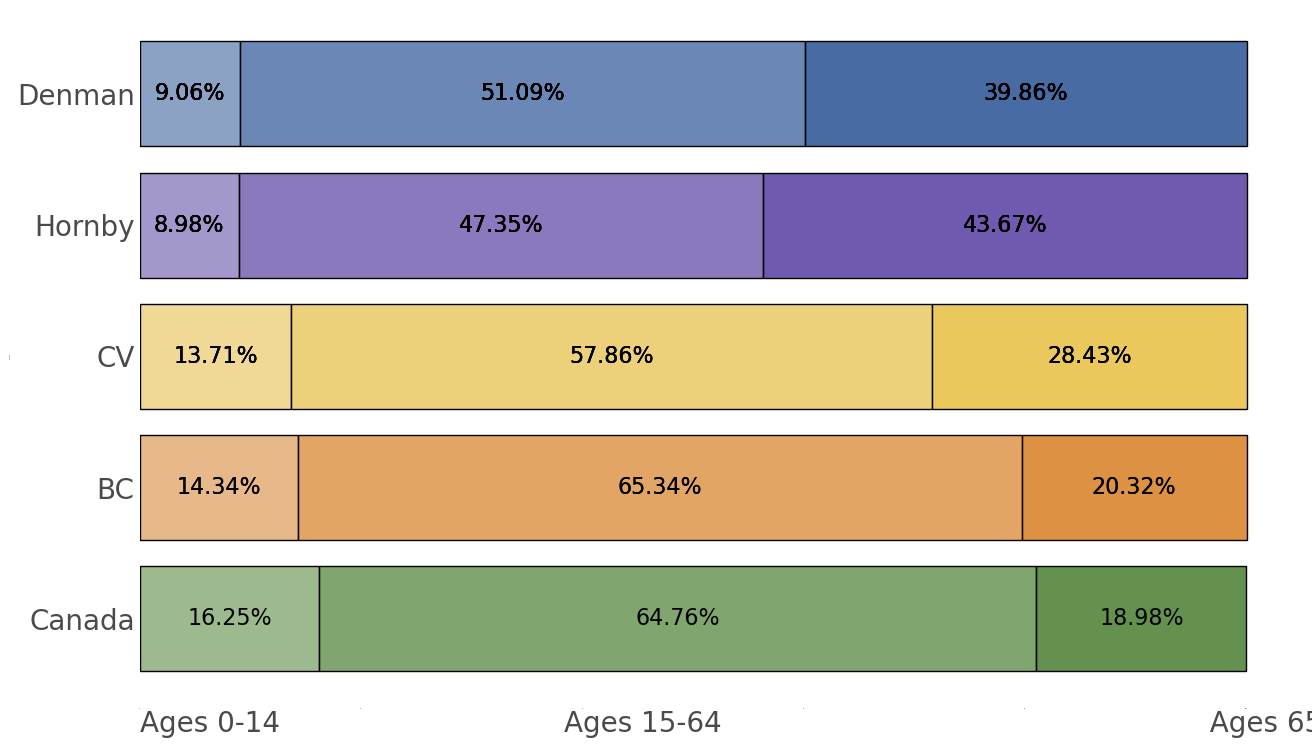

In [5]:
# Setting the main figure and axis parameters for chart
# Each axis is a 15 x 9 subplot
figure, axis = plt.subplots(figsize=(15, 9))

# Set x-axis tickmarks to the bottm
axis.xaxis.tick_bottom()

# Hide y-axis tick marks
axis.tick_params(axis='y', length=0, labelsize=20,
                 labeltop=True, colors="#4A4A4A")

# Hide x-axis tick marks
axis.tick_params(axis='x', length=0, labelsize=0)

# X-Axis labels (Ages)
age_labels = "Ages 0-14                                Ages 15-64                                                       Ages 65+"

# Set and format x-axis labels
axis.set_xlabel(age_labels, labelpad=1, loc='left',
                fontsize=20, color="#4A4A4A", y=.97)

# Set and format y-axis labels
axis.set_ylabel("Location", size=0)

# Hide plot outlines ("spines")
plt.setp(axis.spines.values(), color=None)

# Setting up the parameters for the histplots
hue_order = ["Ages 65+", "Ages 15-64", "Ages 0-14"]

# 4 Ages hue order
# hue_order = ["Ages 65+", "Ages 45-64", "Ages 15-44", "Ages 0-14"]
# hue_order = ["Ages 0-14", "Ages 15-44", "Ages 45-64", "Ages 65+"]


# Regions and palettes to graph
regions = [(denman_df, 'denman'), (hornby_df, 'hornby'),
           (cv_df, 'cv'), (bc_df, 'bc'), (canada_df, 'canada')]

# Additional histplot variables
weights, y, hue, multiple, shrink = "values", "Location", "Ages", "stack", .8

# Looping throug the regions and drawing a histplot for each, using the arguments shown above.
for region in regions:
    sns.histplot(hue_order=hue_order,
                 data=region[0].reset_index(drop=True),
                 weights=weights,
                 y=y,
                 hue=hue,
                 multiple=multiple,
                 shrink=shrink,
                 palette=palette[region[1]],
                 ax=axis).legend_.remove()

    # For each region, loop through the bar sections and assign lables
    for section in axis.containers:
        # Optional: if the segment is small or 0, customize the labels
        # labels = [value.get_height() if value.get_height() else '' for value in section]

        # remove the labels parameter if it's not needed for customized labels
        axis.bar_label(section, fmt='%0.2f%%',
                       label_type='center', fontsize=16)

---

## Variation 2: Single Seaborn Histplot

### _Modified color palette with manually assigned color for each container within subplots._


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("ages.csv", index_col=0).mul(100).round(2)
df = pd.melt(df.reset_index(),
             id_vars=["Ages"],
             var_name="Location",
             value_vars=df.columns, value_name="values")

df

,Ages,Location,values
0,Ages 0-14,Denman,9.06
1,Ages 15-64,Denman,51.09
2,Ages 65+,Denman,39.86
3,Ages 0-14,Hornby,8.98
4,Ages 15-64,Hornby,47.35
5,Ages 65+,Hornby,43.67
6,Ages 0-14,CV,13.71
7,Ages 15-64,CV,57.86
8,Ages 65+,CV,28.43
9,Ages 0-14,BC,14.34


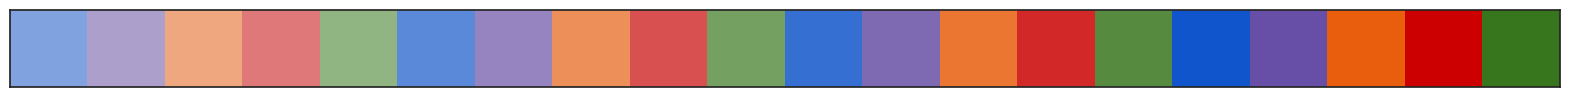

In [7]:
# Set Seaborn plot style: white in the background, no grid lines
sns.set_theme(style="white")


# Set this equal to the number of categories + 3
# This is the number of *evenly spaced* colors to generate/choose from the sns palettes.
# I add three here, because the first three shades are too light in sns.light_palette.
buckets = 7


# assigning regions to color palettes
denman = sns.color_palette(sns.light_palette(
    '#1155CC', buckets, input='hex')[3:]).as_hex()
hornby = sns.color_palette(sns.light_palette(
    '#674EA7', buckets, input='hex')[3:]).as_hex()
cv = sns.color_palette(sns.light_palette(
    '#E95E0D', buckets, input='hex')[3:]).as_hex()
bc = sns.color_palette(sns.light_palette(
    '#CC0000', buckets, input='hex')[3:]).as_hex()
canada = sns.color_palette(sns.light_palette(
    '#38761D', buckets, input='hex')[3:]).as_hex()

# Transposing/stacking colors to create incremented palette
colors = [item for item in zip(denman, hornby, cv, bc, canada)]
regions = [element for item in colors for element in item]

sns.palplot(regions)

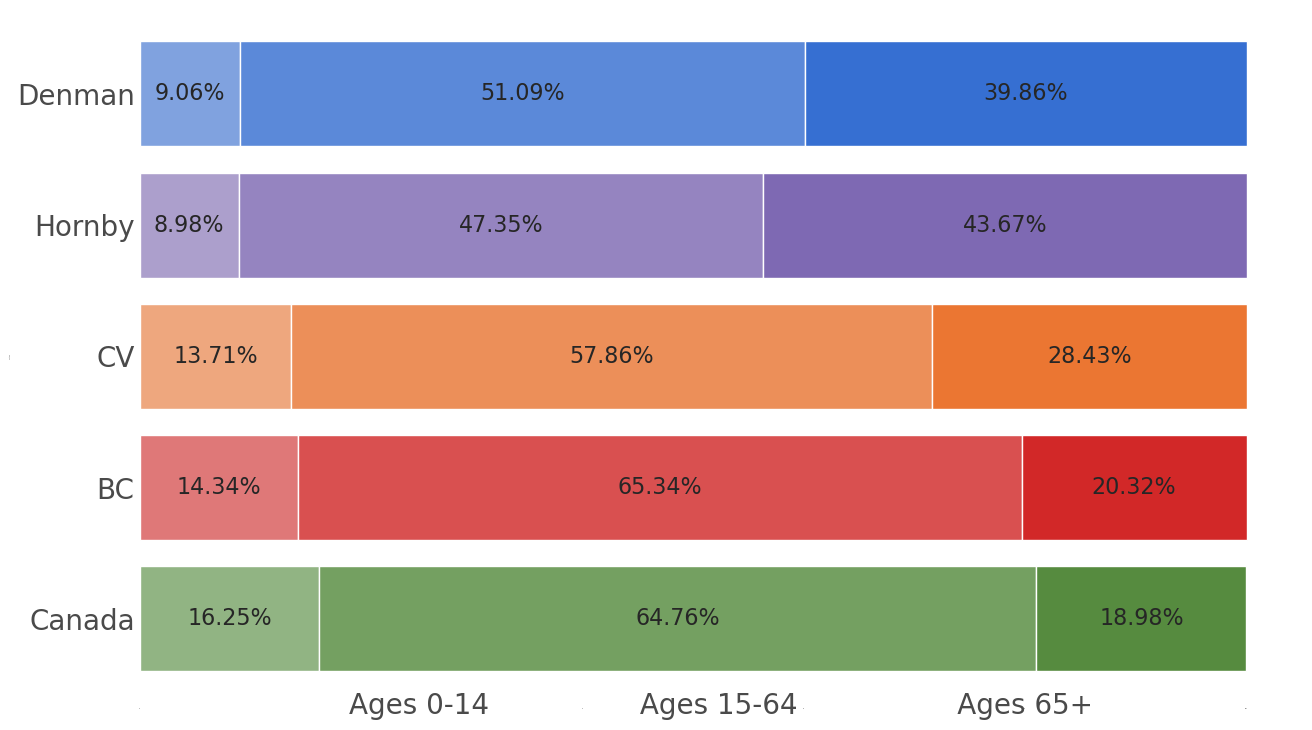

In [27]:
# Setting figure and axis with subplots
figure, axis = plt.subplots(figsize=(15, 9))
axis.xaxis.tick_bottom()
axis.tick_params(axis='y', length=0, labelsize=20,
                 labeltop=True, colors="#4A4A4A")
axis.tick_params(axis='x', length=0, labelsize=0)

# Ages labels
age_labels = "Ages 0-14                 Ages 15-64                  Ages 65+"
axis.set_xlabel(age_labels, loc='center',
                fontsize=20, color="#4A4A4A", labelpad=-12)
axis.xaxis.set_label_position("bottom")

# Location labels
axis.set_ylabel("Location", size=0)

# Remove plot outline ("spine")
plt.box(False)


# Setting histogram parameters
hue_order = ["Ages 65+", "Ages 15-64", "Ages 0-14"]
hue = "Ages"
y = "Location"
weights = "values"
multiple = "stack"
element = "bars"
shrink = .8

# Plot histogram of entire dataframe with weights
sns.histplot(df.reset_index(drop=True),
             y=y,
             weights=weights,
             hue=hue,
             hue_order=hue_order,
             palette=sns.color_palette("flare", 3),
             multiple=multiple,
             element=element,
             shrink=shrink,
             discrete=True,
             legend=False)


# Now, iterate back through all sections in the figure & reassign colors based on regions color palette
for area, color in zip(axis.patches, regions):
    area.set_facecolor(color)

# Next, iterate back through the figure and calculate labels for subsections
for section in axis.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [value.get_height() if value.get_height()
              else '' for value in section]

    # remove the labels parameter if it's not needed for customized labels
    axis.bar_label(section, fmt='%0.2f%%', label_type='center', fontsize=16)

---

### Below are some notes and examples showing different ways to create color palettes.


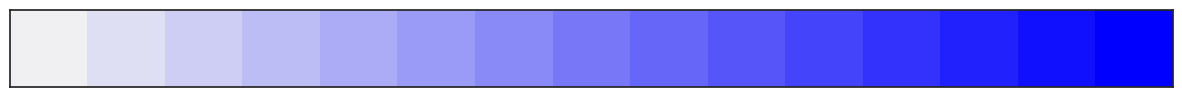

In [9]:
# Example of 15 spaced selections starting with the Seaborn default blue --> white.
sns.palplot(sns.light_palette("blue", 15))

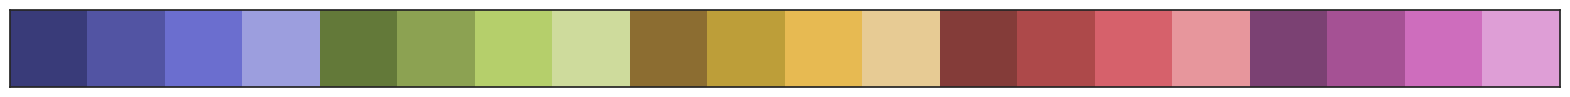

In [10]:
# Example of the Tableau 20b color palette from Seaborn.
# Quite nice, but needs a 5th shade for each color to match our data shape.
sns.palplot(sns.color_palette("tab20b"))

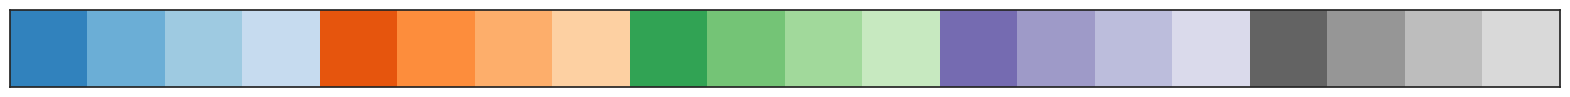

In [11]:
# Example of sampling a set number of colors from the Tableau 20b palette
# Still have a data shape issue (for our purposes), though.
sns.palplot(sns.color_palette("tab20c", 20))

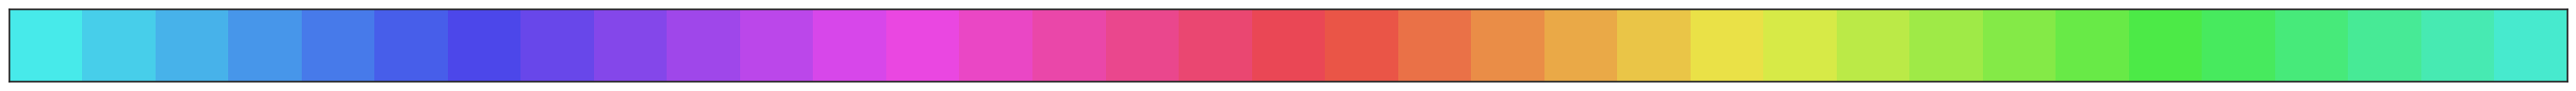

In [12]:
# Random HLS palette
# This could be sampled for color
sns.palplot(sns.hls_palette(n_colors=35, h=.5, l=.6, s=.8))

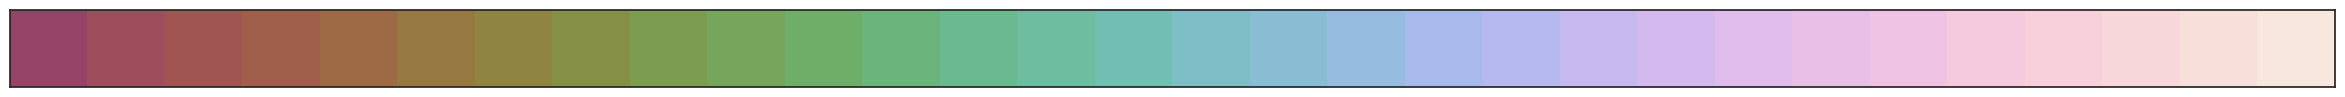

In [13]:
# Random cubehelix palette
# This could be sampled for color
sns.palplot(sns.cubehelix_palette(30, start=-1, rot=1.9,
            hue=1, gamma=.8, dark=.9, light=.3))

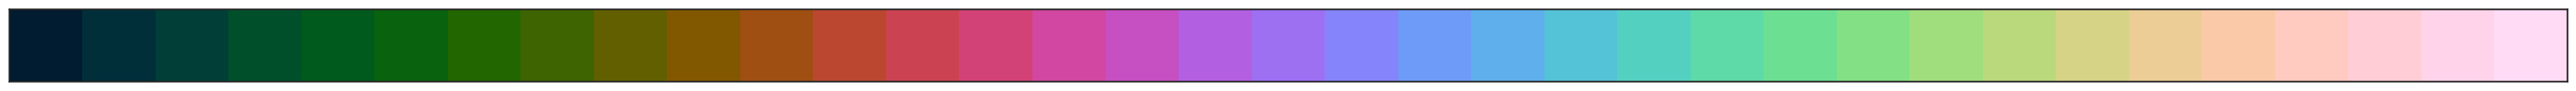

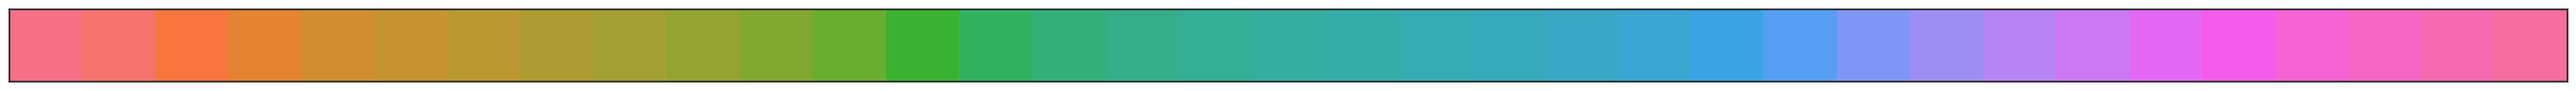

In [14]:
sns.palplot(sns.cubehelix_palette(n_colors=35, start=-.03,
            rot=-2, gamma=.8, hue=1.7, dark=.9, light=.05))
sns.palplot(sns.color_palette("husl", 35))

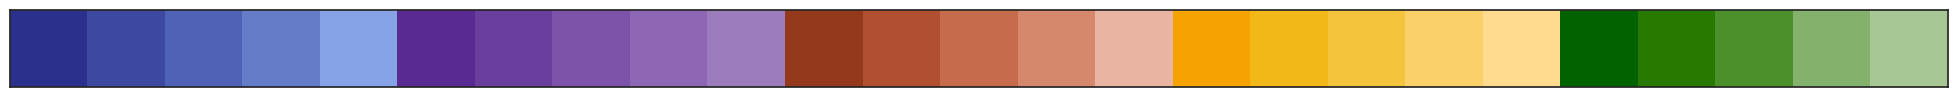

In [15]:
# These are the colors I used for the original plots, but organized by region.
# This doesn't work for a histogram or stacked bar plot, since the default is
# For the drawing algorithm to select only three colors to correspond to the column values.
colors = ["#2a308b", "#3d49a0", "#5062b5", "#657cc9", "#87a3e7",
          "#582a92", "#6a3e9d", "#7c53a8", "#8d67b3", "#9d7cbe",
          "#95391c", "#b05030", "#c66b4b", "#d6886d", "#e9b4a1",
          "#f6a301", "#f2b817", "#f4c43d", "#fad068", "#fedb8f",
          "#016300", "#287900", "#4c902c", "#84b16b", "#a7c794"]

# Plotting the original palette
sns.palplot(colors)

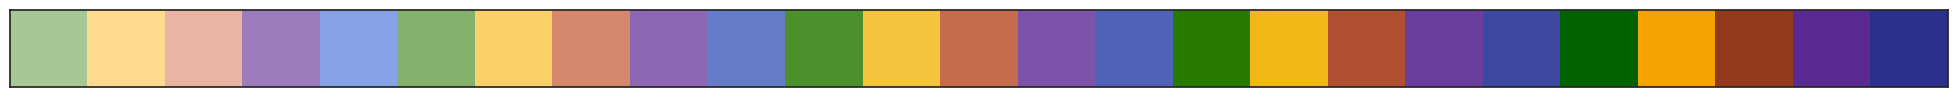

In [16]:
# In order for color assignment to work correctly, colors need to be re-organized by column values.
# This can be accopmlished by using zip, if the list above is devided into sub-rows.
# This will arrange all the light colors, then darker, to darkest.
mor_colors = ['#2a308b', '#582a92', '#95391c', '#f6a301', '#016300',
              '#3d49a0', '#6a3e9d', '#b05030', '#f2b817', '#287900',
              '#5062b5', '#7c53a8', '#c66b4b', '#f4c43d', '#4c902c',
              '#657cc9', '#8d67b3', '#d6886d', '#fad068', '#84b16b',
              '#87a3e7', '#9d7cbe', '#e9b4a1', '#fedb8f', '#a7c794']


# Plotting the tone/shade based palette, lightest to darkest.
sns.palplot(mor_colors[::-1])

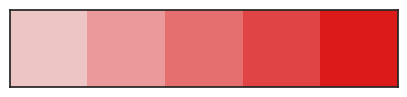

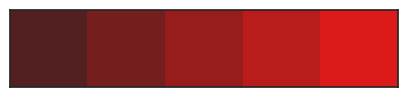

In [17]:
# Examples showing how light_palette and dark_palette *evenly space* the number of colors,
# starting with the "starting" color - in this case, a hex color code.
sns.palplot(sns.light_palette('#DD1A1A', 6, input='hex')[1:])
sns.palplot(sns.dark_palette('#DD1A1A', 6, input='hex')[1:])

In [18]:
# Setting the starting colors for the maps.
color_names = {'red': '#DD1A1A',
               'yellow': '#E5B625',
               'orange': '#D26D03',
               'green': '#326C14',
               'blue': '#0A3A86',
               'd_blue': '#1155CC',
               'purple': '#3F2394',
               'd_purple': '#603AD6'}

# Number of *evenly spaced* colors to generate
increments = 6

# Input format for the starting color
input_format = 'hex'


# Chopping off the first three increments because they're generally too light when using light_palette.
# Outputting as hex codes for ease of use (coverting the RGB is a colossal PITA).
yellows = sns.light_palette(
    color_names['yellow'], increments, input=input_format).as_hex()[3:]
oranges = sns.light_palette(
    color_names['orange'], increments, input=input_format).as_hex()[3:]
greens = sns.light_palette(
    color_names['green'], increments, input=input_format).as_hex()[3:]
blues = sns.light_palette(
    color_names['blue'], increments, input=input_format).as_hex()[3:]
purples = sns.light_palette(
    color_names['purple'], increments, input=input_format).as_hex()[3:]


# Dark equivelent of the same colors (reversed to go lighter --> darker).
# Had to adjust the darker starting colors to lighter, because they went too dark.
d_yellows = sns.dark_palette(
    color_names['yellow'], increments, input=input_format, reverse=True).as_hex()[:3]
d_oranges = sns.dark_palette(
    color_names['orange'], increments, input=input_format, reverse=True).as_hex()[:3]
d_greens = sns.dark_palette(
    color_names['green'], increments, input=input_format, reverse=True).as_hex()[:3]
d_blues = sns.dark_palette(
    color_names['d_blue'], increments, input=input_format, reverse=True).as_hex()[:3]
d_purples = sns.dark_palette(
    color_names['d_purple'], increments, input=input_format, reverse=True).as_hex()[:3]

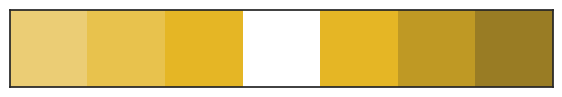

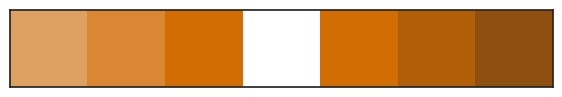

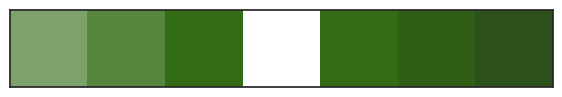

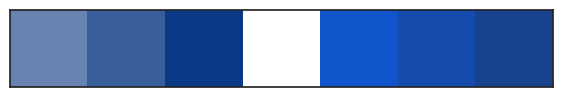

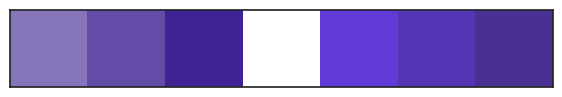

In [19]:
# Light direction vs dark direction for spaced colors
sns.palplot(yellows + ['#FFFFFF'] + d_yellows)
sns.palplot(oranges + ['#FFFFFF'] + d_oranges)
sns.palplot(greens + ['#FFFFFF'] + d_greens)
sns.palplot(blues + ['#FFFFFF'] + d_blues)
sns.palplot(purples + ['#FFFFFF'] + d_purples)

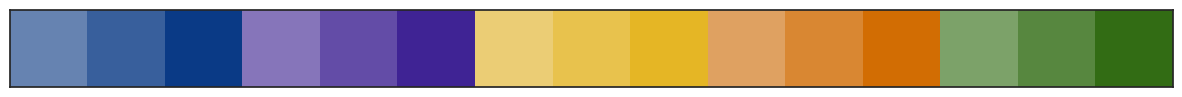

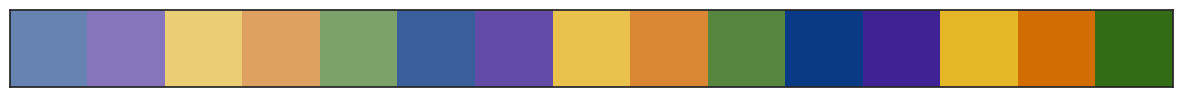

In [20]:
# Spaced color palette light, rows together
row_wise_light = [item for item in sum(
    [blues, purples, yellows, oranges, greens], [])]
sns.palplot(row_wise_light)

# Spaced color palette light, columns together
col_wise_light = [element for item in zip(
    blues, purples, yellows, oranges, greens) for element in item]
sns.palplot(col_wise_light)

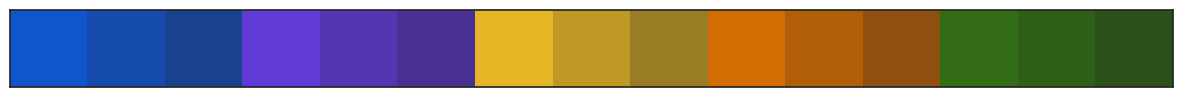

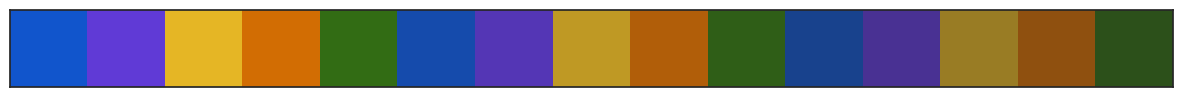

In [21]:
# Spaced color palette dark, rows together
row_wise_dark = [item for item in sum(
    [d_blues, d_purples, d_yellows, d_oranges, d_greens], [])]
sns.palplot(row_wise_dark)

# Spaced color palette dark, columns togethe
col_wise_dark = [element for item in zip(
    d_blues, d_purples, d_yellows, d_oranges, d_greens) for element in item]
sns.palplot(col_wise_dark)